In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.model_selection import GridSearchCV


In [8]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [9]:
train_df = train_df.drop('Unnamed: 0',axis = 1)
test_df = test_df.drop('Unnamed: 0',axis = 1)

In [10]:
train_df_encoded = pd.get_dummies(train_df, columns=['language',	'emotion',	'gender'])
test_df_encoded = pd.get_dummies(test_df, columns=['language',	'emotion',	'gender'])


In [11]:
columns = [column for column in train_df_encoded.columns if 'file_name' != column and 'emotion_' not in column ]
pred_column = 'emotion_SAD'


Logistic Regression

In [12]:
scorer = make_scorer(average_precision_score, needs_proba=True)

# Define the model
model = LogisticRegression(penalty='l1', random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, verbose=5)


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [13]:
grid_search.fit(train_df_encoded[columns], train_df_encoded[pred_column])


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.916 total time=   1.6s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.877 total time=   2.9s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.949 total time=   1.2s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.913 total time=   1.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.886 total time=   2.3s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.419 total time=   1.1s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.402 total time=   1.1s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.425 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.396 total time=   0.9s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.427 total time=   0.8s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.893 total time=   3.5s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.871 total time=  10.6s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.930 total time=   1.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.948 total time=   2.3s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.922 total time=   1.0s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.419 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.402 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.425 total time=   0.9s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.396 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.427 total time=   0.8s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.885 total time=   4.5s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .............C=1, solver=liblinear;, score=0.865 total time=   7.3s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .............C=1, solver=liblinear;, score=0.877 total time=  26.3s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .............C=1, solver=liblinear;, score=0.943 total time=   6.7s
[CV 5/5] END .............C=1, solver=liblinear;, score=0.924 total time=   2.1s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.419 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.402 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.425 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.396 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.427 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ............C=10, solver=liblinear;, score=0.861 total time= 1.4min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ............C=10, solver=liblinear;, score=0.847 total time= 1.9min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ............C=10, solver=liblinear;, score=0.859 total time= 1.6min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ............C=10, solver=liblinear;, score=0.911 total time= 1.8min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ............C=10, solver=liblinear;, score=0.921 total time= 1.8min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.419 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.402 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.425 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.396 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.427 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...........C=100, solver=liblinear;, score=0.881 total time= 2.6min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=liblinear;, score=0.824 total time= 1.9min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=liblinear;, score=0.887 total time= 1.7min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........C=100, solver=liblinear;, score=0.925 total time= 1.8min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...........C=100, solver=liblinear;, score=0.914 total time= 1.8min


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.419 total time=   0.8s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.402 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.425 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.396 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=100, solver=saga;, score=0.427 total time=   0.7s


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(average_precision_score, response_method='predict_proba'),
             verbose=5)

In [14]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score: 0.91


In [15]:
best_model = grid_search.best_estimator_


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict test data
y_pred = best_model.predict(test_df_encoded[columns])

# Evaluate the model
print("Test Accuracy:", accuracy_score(test_df_encoded[pred_column], y_pred))
print("Classification Report:\n", classification_report(test_df_encoded[pred_column], y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_df_encoded[pred_column], y_pred))

Test Accuracy: 0.9554655870445344
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       167
           1       0.94      0.93      0.93        80

    accuracy                           0.96       247
   macro avg       0.95      0.95      0.95       247
weighted avg       0.96      0.96      0.96       247

Confusion Matrix:
 [[162   5]
 [  6  74]]


In [27]:
y_pred_prob = best_model.predict_proba(test_df_encoded[columns])

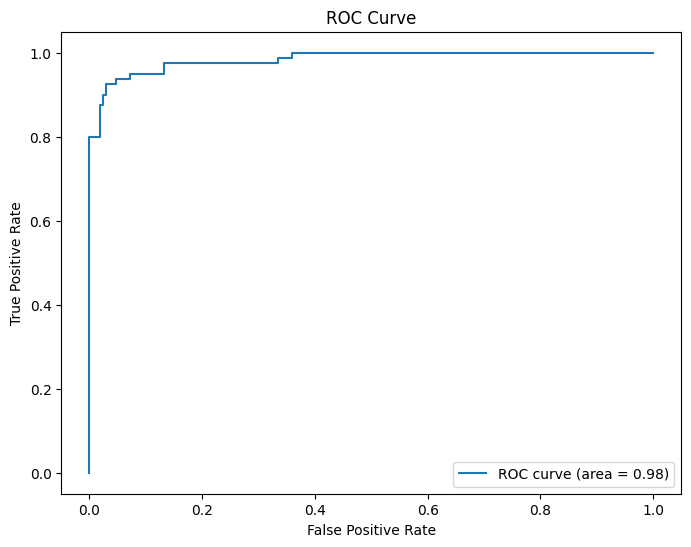

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_df_encoded[pred_column], y_pred_prob[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(test_df_encoded[pred_column], y_pred_prob[:, 1]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

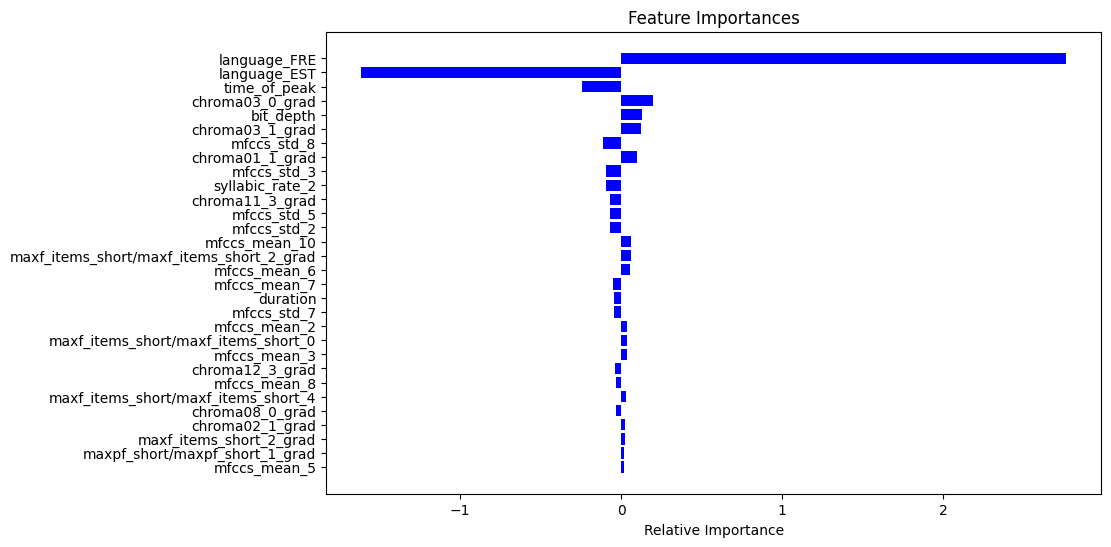

In [44]:
features = columns
coefficients = best_model.coef_.flatten()
indices = np.argsort(np.abs(coefficients))[-30:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), coefficients[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

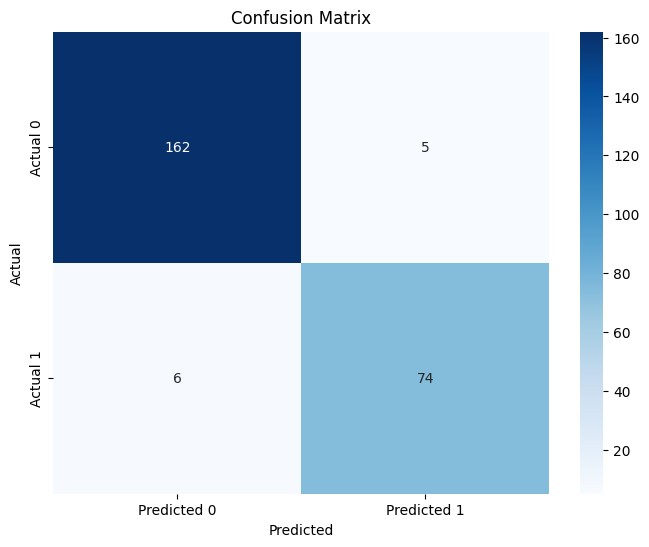

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
cm = confusion_matrix(test_df_encoded[pred_column], y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()